### import 需要的套件

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear regssion

In [23]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
x = diabetes.data[:,np.newaxis, 2]
print("Data shape: ", x.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

Data shape:  (442, 1)


In [13]:
# 什麼是newaxis
import numpy as np
x1 = np.array([10, 20, 30], float)
print ("shape of x1 is ", x1.shape)
print (x1)

x2 = x1[:, np.newaxis]
print ("shape of x2 is ", x2.shape)
print (x2)

x3 = x1[np.newaxis, :]
print ("shape of x3 is ", x3.shape)
print (x3)

shape of x1 is  (3,)
[10. 20. 30.]
shape of x2 is  (3, 1)
[[10.]
 [20.]
 [30.]]
shape of x3 is  (1, 3)
[[10. 20. 30.]]


In [24]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(x, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [27]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


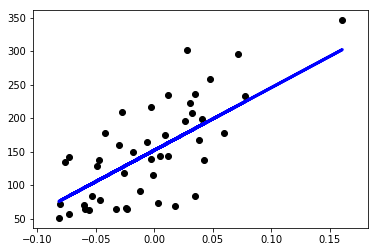

In [28]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### Logistics regression

In [30]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

C:\Users\edith_lin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\edith_lin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8666666666666667


### 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型

#### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

### 分類問題

In [35]:
# 讀取wine的資料集
wine = datasets.load_wine()

In [36]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [38]:
# wine是分類問題 所以用Logistics regression
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=0.4, random_state = 4)
# 建立模型
logistics = linear_model.LogisticRegression()

# 訓練模型
logistics.fit(x_train, y_train)

# 預測測試集
y_pred = logistics.predict(x_test)

C:\Users\edith_lin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\edith_lin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
acc = accuracy_score(y_test, y_pred)
acc

0.9444444444444444

### 回歸問題

In [60]:
# 讀取波士頓房價資料集
boston = datasets.load_boston()

In [61]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [62]:
# boston是回歸問題

# 為方便視覺化，只使用資料集中的 1 個 feature (column)
# 6表示第六個特徵
x = boston.data[:, np.newaxis, 6]
print("Data shape: ", x.shape)  # 有 506 筆資料與我們取出的其中一個 feature

Data shape:  (506, 1)


In [63]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(x, boston.target, test_size=0.4, random_state=4)

# 建立一個線性回歸模型
reg = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
reg.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = reg.predict(x_test)

In [64]:
# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)

#預測值與實際值的差距，使用 MSE
print('MSE:%.2f'% mean_squared_error(y_test, y_pred))

Coefficients:  [-0.11812416]
MSE:96.25


由從上面結果可知，用第六個特徵做預測，錯誤率很高

In [65]:
# 改用第五特徵
x = boston.data[:, np.newaxis, 5]

In [66]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(x, boston.target, test_size=0.4, random_state=4)

# 建立一個線性回歸模型
reg = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
reg.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = reg.predict(x_test)

# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)

#預測值與實際值的差距，使用 MSE
print('MSE:%.2f'% mean_squared_error(y_test, y_pred))

Coefficients:  [9.20453438]
MSE:57.76


由上可知，改用第五個特徵做預測，錯誤率降低了!

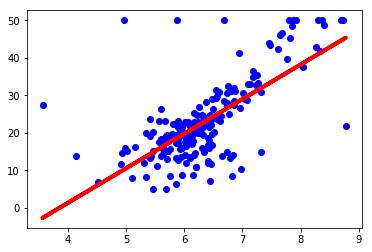

In [67]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=4)
plt.show()